In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy.stats as st

In [ ]:
cd/content/sample_data

/content/sample_data


In [ ]:
pp= pd.read_csv("/content/StaritaDiarios96_2019prec.csv.csv",index_col=16,parse_dates=True)

In [ ]:
pp.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Valor,Grado,Calificador,NivelAprobacion
Fecha,,,,,,,,,,,,,,,,,,,,
1996-01-01,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-02,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-03,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-04,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-05,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900


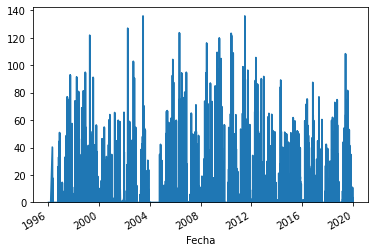

In [ ]:
pp["Valor"].plot(kind="area")

In [ ]:
AñoSelecccionado=pp['Valor'].loc['2012-01-01':'2012-12-31']
AñoSelecccionado

Fecha
2012-01-01    0.0
2012-01-02    0.0
2012-01-03    0.0
2012-01-04    0.0
2012-01-05    0.0
             ... 
2012-12-27    0.0
2012-12-28    0.0
2012-12-29    0.0
2012-12-30    0.0
2012-12-31    0.0
Name: Valor, Length: 364, dtype: float64

In [ ]:
pp = pp[pp['Valor'].isnull()==False]  #Si quisiera eliminar los valores vacios
pp['day']= pp.index.day
pp['month']= pp.index.month
pp['year']= pp.index.year # para que salga una columna adicional con los dias, meses o años
pp
pp

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Valor,Grado,Calificador,NivelAprobacion,day,month,year
Fecha,,,,,,,,,,,,,,,,,,,,,,,
1996-01-01,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,1,1,1996
1996-01-02,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,2,1,1996
1996-01-03,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,3,1,1996
1996-01-04,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,4,1,1996
1996-01-05,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,5,1,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,27,12,2019
2019-12-28,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900,28,12,2019
2019-12-29,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,3.7,50,NaN,900,29,12,2019


In [ ]:
slope, intercept, CorrelationCoeffcient, Pvalue, StandarError = st.linregress(np.arange(pp.index.shape[0]),pp['Valor'])

In [ ]:
slope, intercept, CorrelationCoeffcient, Pvalue, StandarError

(0.00017748349608498847,
 4.175750517441834,
 0.0305511223226372,
 0.006385233166453247,
 6.505907454147801e-05)

In [ ]:
x=pp['Valor']

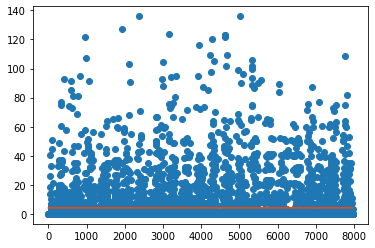

In [ ]:
plt.plot([0,len(pp)],[slope*x.min()+intercept, slope*x.max()+intercept], color='orangered')
plt.scatter(np.arange(pp.index.shape[0]),pp['Valor'])
# Se corrobora q no existe una correlacion lineal entre los valores de precipitacion y el tiempo

In [31]:
promedio = pp['Valor'].mean()
desviacion= pp['Valor'].std()
mediana= pp['Valor'].median()
print(promedio,desviacion, mediana)


4.882756024096377 13.363393563041852 0.0


In [ ]:
# Datos de precipitacion respecto de las distribuciones
tabulaciones= np.arange(pp.Valor.min(), pp.Valor.max(),0.1)
distnormal = st.norm.pdf(tabulaciones, loc=promedio, scale=desviacion)
distlognormal=st.pearson3.pdf(tabulaciones, skew=1, loc=promedio, scale=desviacion)
distweibull=st.dweibull.pdf(tabulaciones, c=1, loc=promedio, scale=desviacion)
distchi2=st.chi2.pdf(tabulaciones, df=2, loc=promedio, scale=desviacion)


In [ ]:
ppMensual=pp[["month","Valor"]].groupby("month").sum()
ppMensual
#ppmayor_a_cero=pp[pp['month','Valor']>0]
#ppmayor_a_cero

,Valor
month,
1,248.1
2,644.2
3,1310.4
4,4653.5
5,6059.4
6,5663.7
7,5323.4
8,3949.0
9,3585.8


In [ ]:
ppSolo=pp[["Valor"]]
ppSolo

,Valor
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,3.7


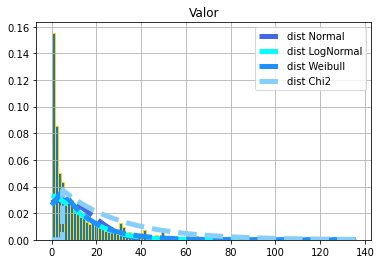

In [ ]:
# precipitaciones y distibuciones  grafico para ver a cual se asemeja
ppSolo[ppSolo['Valor']>0].hist(bins=100, density=True, edgecolor='gold')
plt.plot(tabulaciones, distnormal, color='royalblue', lw=5, ls='--', label='dist Normal')
plt.plot(tabulaciones, distlognormal, color='cyan', lw=5, ls='--', label='dist LogNormal')
plt.plot(tabulaciones, distweibull, color='dodgerblue', lw=5, ls='--', label='dist Weibull')
plt.plot(tabulaciones, distchi2, color='lightskyblue', lw=5, ls='--', label='dist Chi2')
plt.legend()
plt.rcParams['figure.figsize']=25,15


In [ ]:
# Periodo de retorno con Scipy para 100 años
p100y_norm = st.norm.ppf([1-1/100], loc=promedio, scale=desviacion)
p100y_lognorm = st.pearson3.ppf([1-1/100], skew=1, loc=promedio, scale=desviacion)
p100y_weibull = st.dweibull.ppf([1-1/100], c=1, loc=promedio, scale=desviacion)
p100y_chi2 = st.chi2.ppf([1-1/100], df=2, loc=promedio, scale=desviacion)
print('Precipitación para Tr=100 años Dis Normal =', p100y_norm[0])
print('Precipitación para Tr=100 años Dis LogNormal =', p100y_lognorm[0])
print('Precipitación para Tr=100 años Dis Weibull =', p100y_weibull[0])
print('Precipitación para Tr=100 años Dis Chi2 =', p100y_chi2[0])

Precipitación para Tr=100 años Dis Normal = 35.970658229449846
Precipitación para Tr=100 años Dis LogNormal = 45.27439826686256
Precipitación para Tr=100 años Dis Weibull = 57.16065907330649
Precipitación para Tr=100 años Dis Chi2 = 127.96415926438736


In [ ]:
# Periodo de retorno con Scipy para 10 años
p10y_norm = st.norm.ppf([1-1/10], loc=promedio, scale=desviacion)
p10y_lognorm = st.pearson3.ppf([1-1/10], skew=1, loc=promedio, scale=desviacion)
p10y_weibull = st.dweibull.ppf([1-1/10], c=1, loc=promedio, scale=desviacion)
p10y_chi2 = st.chi2.ppf([1-1/10], df=2, loc=promedio, scale=desviacion)
print('Precipitación para Tr=10 años Dis Normal =', p10y_norm[0])
print('Precipitación para Tr=10 años Dis LogNormal =', p10y_lognorm[0])
print('Precipitación para Tr=10 años Dis Weibull =', p10y_weibull[0])
print('Precipitación para Tr=10 años Dis Chi2 =', p10y_chi2[0])

Precipitación para Tr=10 años Dis Normal = 22.008633965801298
Precipitación para Tr=10 años Dis LogNormal = 22.79493562321738
Precipitación para Tr=10 años Dis Weibull = 26.390308263233752
Precipitación para Tr=10 años Dis Chi2 = 66.42345764424189


In [ ]:
# Periodo de retorno con Scipy para 3 años
p3y_norm = st.norm.ppf([1-1/3], loc=promedio, scale=desviacion)
p3y_lognorm = st.pearson3.ppf([1-1/3], skew=1, loc=promedio, scale=desviacion)
p3y_weibull = st.dweibull.ppf([1-1/3], c=1, loc=promedio, scale=desviacion)
p3y_chi2 = st.chi2.ppf([1-1/3], df=2, loc=promedio, scale=desviacion)
print('Precipitación para Tr=10 años Dis Normal =', p3y_norm[0])
print('Precipitación para Tr=10 años Dis LogNormal =', p3y_lognorm[0])
print('Precipitación para Tr=10 años Dis Weibull =', p3y_weibull[0])
print('Precipitación para Tr=10 años Dis Chi2 =', p3y_chi2[0])

Precipitación para Tr=10 años Dis Normal = 10.638734442927698
Precipitación para Tr=10 años Dis LogNormal = 8.581754681438696
Precipitación para Tr=10 años Dis Weibull = 10.301145839827093
Precipitación para Tr=10 años Dis Chi2 = 34.24513279742857


In [ ]:
pp.dtypes

CodigoEstacion        int64
NombreEstacion       object
Latitud             float64
Longitud            float64
Altitud               int64
Categoria            object
Entidad              object
AreaOperativa        object
Departamento         object
Municipio            object
FechaInstalacion     object
FechaSuspension     float64
IdParametro          object
Etiqueta             object
DescripcionSerie     object
Frecuencia           object
Valor               float64
Grado                 int64
Calificador          object
NivelAprobacion       int64
day                   int64
month                 int64
year                  int64
dtype: object

In [ ]:
# La probabilidad de que se de un evento de 10 con Pearson3, a medida que aumenta el valor aumenta la probabilidad por lo que debe revisarse
x=st.pearson3(skew=1,loc=promedio, scale=desviacion)
x.cdf(1)

0.4457694363850948

In [ ]:
ppSolo['year']=ppSolo.index.year
ppSolo.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Valor,year
Fecha,,
1996-01-01,0.0,1996
1996-01-02,0.0,1996
1996-01-03,0.0,1996
1996-01-04,0.0,1996
1996-01-05,0.0,1996


In [ ]:
Agrupadopp=ppSolo.groupby('year').max()
Agrupadopp.head()

,Valor
year,
1996,51.0
1997,93.1
1998,95.0
1999,122.0
2000,64.1


In [ ]:
Agrupadopp=Agrupadopp.sort_values('Valor', ascending=False)
Agrupadopp.head()

,Valor
year,
2011,136.0
2003,136.0
2002,127.1
2006,123.8
2010,123.4


In [ ]:
# La probabilidad de tener precipitaciones desde valores mayores a menores
Agrupadopp['Probability']=[(i+1)/(len(Agrupadopp)+1) for i in range(len(Agrupadopp))]
Agrupadopp.head()

,Valor,Probability
year,,
2011,136.0,0.04
2003,136.0,0.08
2002,127.1,0.12
2006,123.8,0.16
2010,123.4,0.20


In [ ]:
Agrupadopp['returnPeriod']=1/Agrupadopp['Probability']
Agrupadopp.head()

,Valor,Probability,returnPeriod
year,,,
2011,136.0,0.04,25.000000
2003,136.0,0.08,12.500000
2002,127.1,0.12,8.333333
2006,123.8,0.16,6.250000
2010,123.4,0.20,5.000000
